In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os

from main import DCTrader, Backtest, DCTracker, StockDataLoader
from trainer import GATrainer, PSOTrainer

In [3]:
ticker = 'test'

test = StockDataLoader(ticker=ticker)
test.load_data()

test: 49 loaded days | 2020-01-01 to 2020-02-18


In [4]:
test.data

,Date,Close
0,2020-01-01,99.9
1,2020-01-02,98.0
2,2020-01-03,97.0
3,2020-01-04,94.0
4,2020-01-05,98.0
5,2020-01-06,102.0
6,2020-01-07,104.0
7,2020-01-08,103.0
8,2020-01-09,109.0
9,2020-01-10,110.0


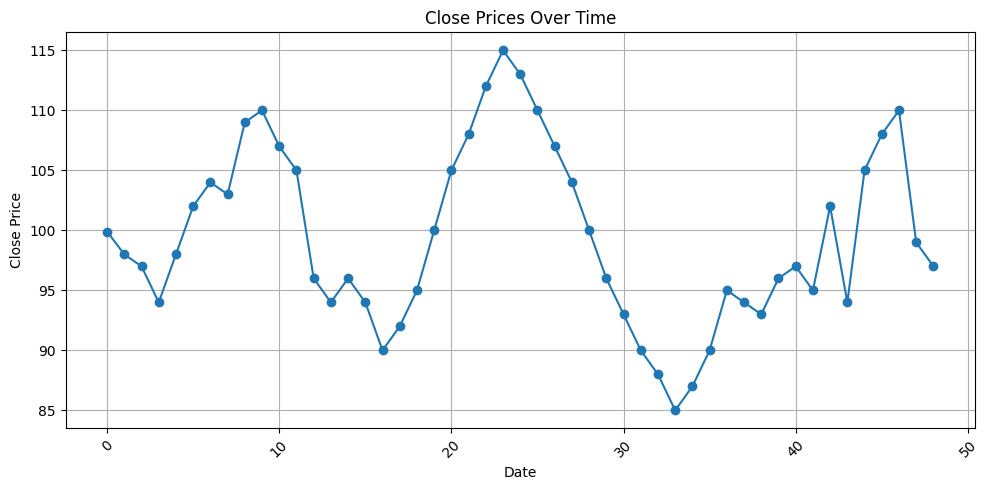

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(test.data['Close'], marker='o')
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [6]:
tracker = DCTracker(theta=0.06)

dc_confirmations = []

for idx, row in test.data.iterrows():
    t = idx  # Tiempo como índice entero
    p = row['Close']
    tracker.update(t, p)
    
    if tracker.is_dcc:
        dc_confirmations.append({
            'index': idx,
            'date': row['Date'].date(),
            'price': p,
            'new_trend': tracker.trend,
            'from_ext': tracker.p_ext_initial
        })

print("\n=== DC CONFIRMATIONS DETECTADAS (theta=6%) ===")
for c in dc_confirmations:
    print(f"Index {c['index']:2d} | {c['date']} | Precio {c['price']:6.2f} → {c['new_trend'].upper()} "
          f"(desde extremum {c['from_ext']:.2f})")


=== DC CONFIRMATIONS DETECTADAS (theta=6%) ===
Index  5 | 2020-01-06 | Precio 102.00 → UPTREND (desde extremum 94.00)
Index 12 | 2020-01-13 | Precio  96.00 → DOWNTREND (desde extremum 110.00)
Index 19 | 2020-01-20 | Precio 100.00 → UPTREND (desde extremum 90.00)
Index 26 | 2020-01-27 | Precio 107.00 → DOWNTREND (desde extremum 115.00)
Index 36 | 2020-02-06 | Precio  95.00 → UPTREND (desde extremum 85.00)
Index 43 | 2020-02-13 | Precio  94.00 → DOWNTREND (desde extremum 102.00)
Index 44 | 2020-02-14 | Precio 105.00 → UPTREND (desde extremum 94.00)
Index 47 | 2020-02-17 | Precio  99.00 → DOWNTREND (desde extremum 110.00)


In [7]:
print("=== ESTADO FINAL DEL TRACKER ===")
print(tracker)

=== ESTADO FINAL DEL TRACKER ===
=== DCTracker State ===
Theta: 0.0600
Current trend: downtrend
Current extreme price (p_ext): 97.000
Time of extreme (t_ext): 48
Theoretical DCC (p_dcc_star): 103.400
Initial extreme cycle: 110.000
Last DCC time: 47
Current OS length: 1
Last DC duration: 1
Is DCC now?: False
Current OSV: 1.032
Current TMV: 1.970

=== Statistics ===
DC events: 8
OS events: 7
Total DC time: 17
Total OS time: 30

Recent trends: ['uptrend', 'downtrend', 'uptrend', 'downtrend', 'uptrend']
Recent OS flags: [True, True, True, False, True]


In [8]:
tracker.state

AttributeError: 'DCTracker' object has no attribute 'state'

In [ ]:
from strategies import St1, St2, St3, St4, St5, St6, St7, St8

thresholds = [0.00098, 0.0022, 0.0048, 0.0072, 0.0098, 0.0122, 0.0155, 0.017, 0.02, 0.0255]
strategies = [St1, St2, St3, St4, St5, St6, St7, St8]

# Modo entrenamiento (precomputa estados)
trader = DCTrader(
    ticker=ticker,
    thresholds=thresholds,
    strategies=strategies,
    is_train=True,
    )

test: 49 loaded days | 2020-01-01 to 2020-02-18


AttributeError: 'DCTracker' object has no attribute 'states'